<h1>Tratamento de Outliers</h1>

In [1]:
import random
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame([random.gauss(0, sigma=1) for i in range(5000)], columns=['value'])
df.loc[df.sample(10).index,'value'] += 3
df.loc[df.sample(10).index,'value'] -= 3
df.head()

,value
0,-0.391162
1,-0.408215
2,-0.231735
3,0.658681
4,1.135130


In [3]:
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1
print('Q1', Q1)
print('Q3', Q3)
print('IQR', IQR)
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print('Normal Range', lower_bound, '-', upper_bound)

Q1 -0.6688049236392031
Q3 0.6711883389404373
IQR 1.3399932625796405
Normal Range -2.6787948175086638 - 2.681178232809898


In [4]:
df['value'].describe(percentiles=[0.01, 0.1, 0.25, 0.50, 0.75, 0.90, 0.99])

count    5000.000000
mean       -0.008460
std         1.013798
min        -5.174020
1%         -2.405579
10%        -1.310915
25%        -0.668805
50%         0.021331
75%         0.671188
90%         1.272117
99%         2.316196
max         4.626980
Name: value, dtype: float64

<AxesSubplot:xlabel='value'>

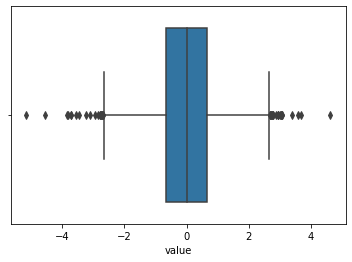

In [5]:
import seaborn as sns
sns.boxplot(data=df, x=df['value'])

In [6]:
from scipy import stats
z = np.abs(stats.zscore(df.value))
print(z.head())

0    0.377531
1    0.394354
2    0.220258
3    0.658127
4    1.128139
Name: value, dtype: float64


In [7]:
df[(df['value'] < df['value'].mean() - 3 * df['value'].std()) | (df['value'] > df['value'].mean() + 3 * df['value'].std())].shape

(17, 1)

In [8]:
df[z>3].shape

(17, 1)

In [9]:
new_df = df[z<3]
new_df.shape

(4983, 1)

In [10]:
lower_bound = df.value.mean()-3*df.value.std()
upper_bound = df.value.mean()+3*df.value.std()
df[df.value < lower_bound] = lower_bound
df[df.value > upper_bound] = upper_bound
print('lower_bound', lower_bound)
print('upper_bound', upper_bound)

lower_bound -3.0498546051301543
upper_bound 3.0329341880118856


In [11]:
df.describe(percentiles=[0.01, 0.1, 0.25, 0.50, 0.75, 0.90, 0.99])

,value
count,5000.000000
mean,-0.007571
std,1.005916
min,-3.049855
1%,-2.405579
10%,-1.310915
25%,-0.668805
50%,0.021331
75%,0.671188
90%,1.272117


<AxesSubplot:xlabel='value'>

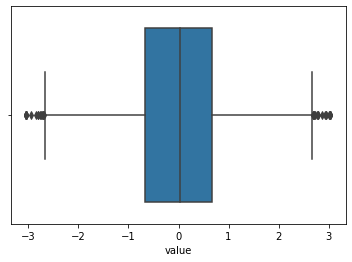

In [12]:
sns.boxplot(data=df, x=df['value'])